In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np      
import pandas as pd     
import matplotlib.pyplot as plt 
import seaborn as sns   
%matplotlib inline
import keras
from keras.models import *
from keras.layers import *
import tensorflow as tf
from sklearn.metrics import accuracy_score

2024-01-24 03:33:42.995058: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data=pd.read_csv("airplane services.csv")

In [3]:
data.shape

(50000, 24)

In [4]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
data.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [6]:
data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             158
satisfaction                           0
dtype: int64

In [7]:
data["Arrival Delay in Minutes"].fillna(data["Arrival Delay in Minutes"].mean(),inplace=True)

In [8]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,50000.0,NaN,NaN,NaN,42942.46444,28035.881699,1.0,12500.75,50719.5,68216.25,80716.0
Gender,50000,2,Female,25224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,50000,2,Loyal Customer,40883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,50000.0,NaN,NaN,NaN,39.58624,15.139425,7.0,27.0,40.0,51.0,85.0
Type of Travel,50000,2,Business travel,34598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,50000,3,Business,24513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,50000.0,NaN,NaN,NaN,1180.47108,1017.147731,56.0,399.0,802.0,1744.0,4963.0
Inflight wifi service,50000.0,NaN,NaN,NaN,2.72356,1.328961,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,50000.0,NaN,NaN,NaN,3.06092,1.52619,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,50000.0,NaN,NaN,NaN,2.7577,1.409706,0.0,2.0,3.0,4.0,5.0


In [9]:
categorical_col,continuous_col=[],[]    #creating two categories for column distribution
def categorical_continuous_columns(data):   #defining a function


 for col in data.columns:   #for loop to check for all column in data.columns
    if data[col].value_counts().count()<7:  #cheking if varieties are less than 7
        categorical_col.append(col)         #if condition is true column will add into categorical_col
    else:
        continuous_col.append(col)          #if above condition is false col will add in continuous_col
 return categorical_col,continuous_col

In [10]:
categorical_col,continuous_col=categorical_continuous_columns(data)

In [11]:
categorical_col

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

In [12]:
continuous_col

['id',
 'Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

**************************************************
value_counts for category Gender

Female    25224
Male      24776
Name: Gender, dtype: int64
**************************************************


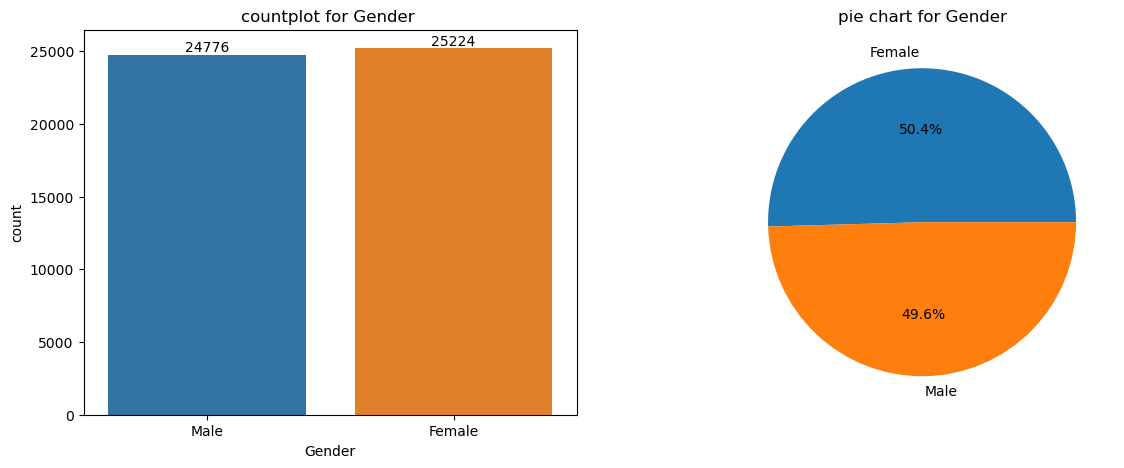

**************************************************
value_counts for category Customer Type

Loyal Customer       40883
disloyal Customer     9117
Name: Customer Type, dtype: int64
**************************************************


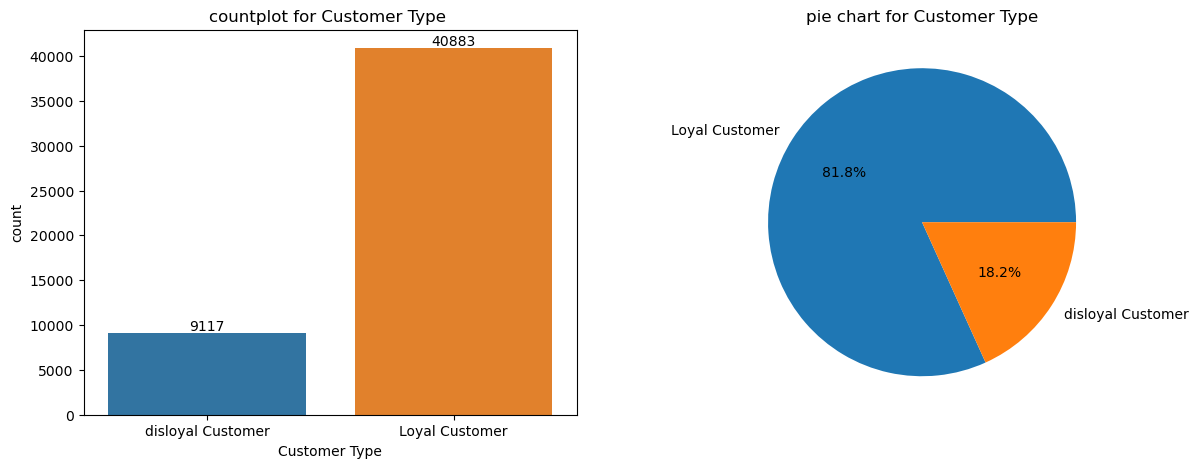

**************************************************
value_counts for category Type of Travel

Business travel    34598
Personal Travel    15402
Name: Type of Travel, dtype: int64
**************************************************


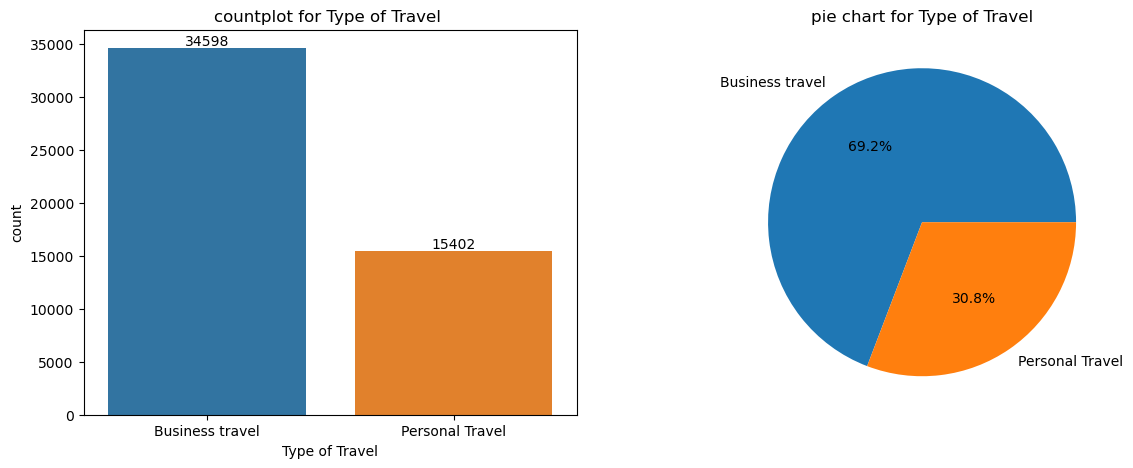

**************************************************
value_counts for category Class

Business    24513
Eco         21996
Eco Plus     3491
Name: Class, dtype: int64
**************************************************


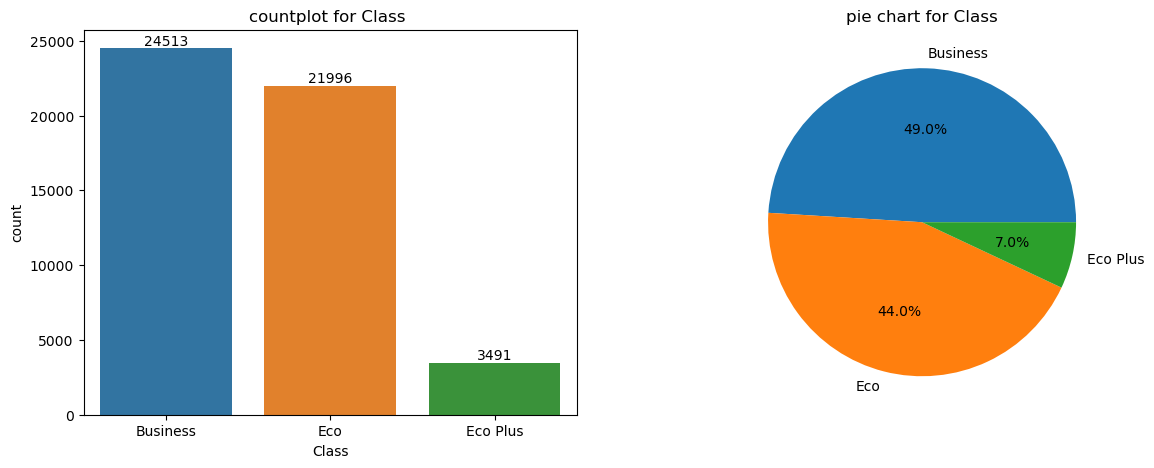

**************************************************
value_counts for category Inflight wifi service

2    12447
3    12445
4     9466
1     8620
5     5493
0     1529
Name: Inflight wifi service, dtype: int64
**************************************************


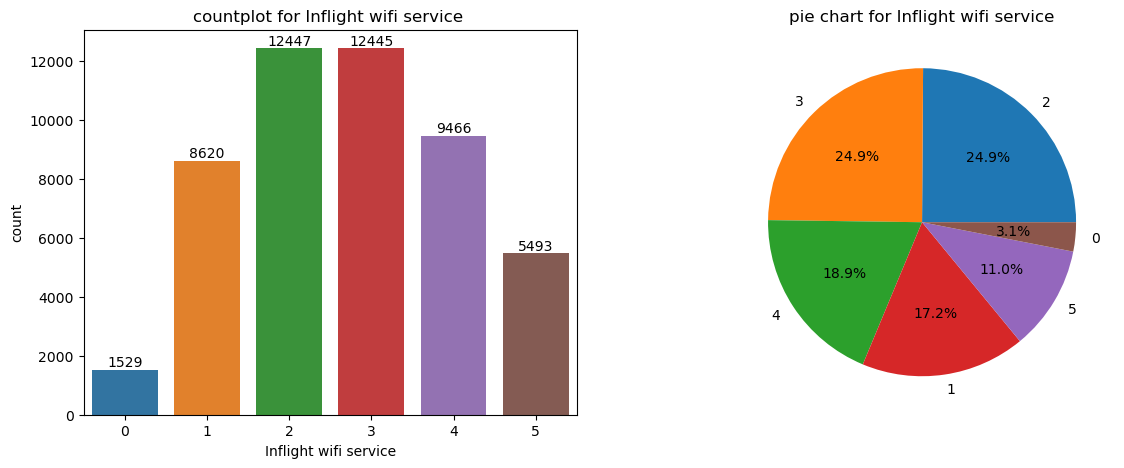

**************************************************
value_counts for category Departure/Arrival time convenient

4    12264
5    10800
3     8717
2     8203
1     7433
0     2583
Name: Departure/Arrival time convenient, dtype: int64
**************************************************


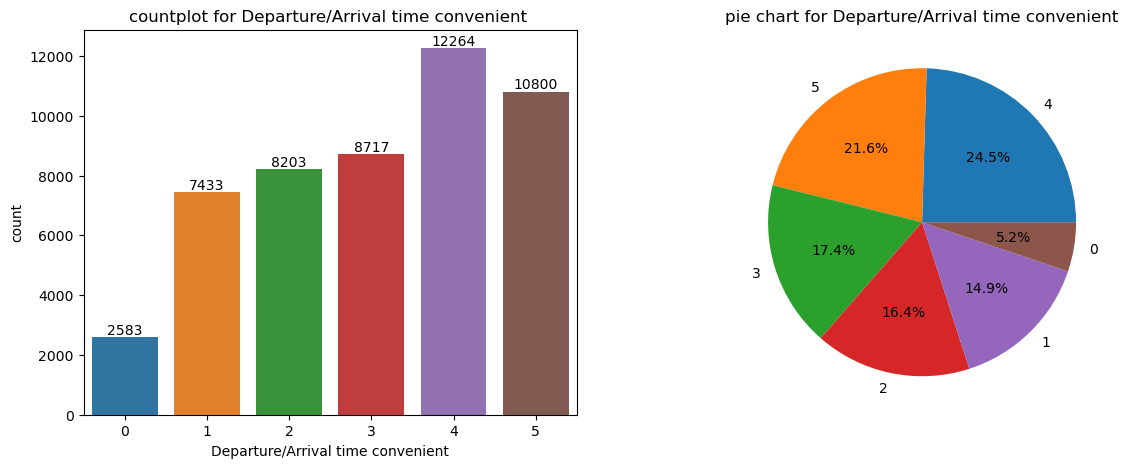

**************************************************
value_counts for category Ease of Online booking

3    11655
2    11476
4     9410
1     8348
5     6796
0     2315
Name: Ease of Online booking, dtype: int64
**************************************************


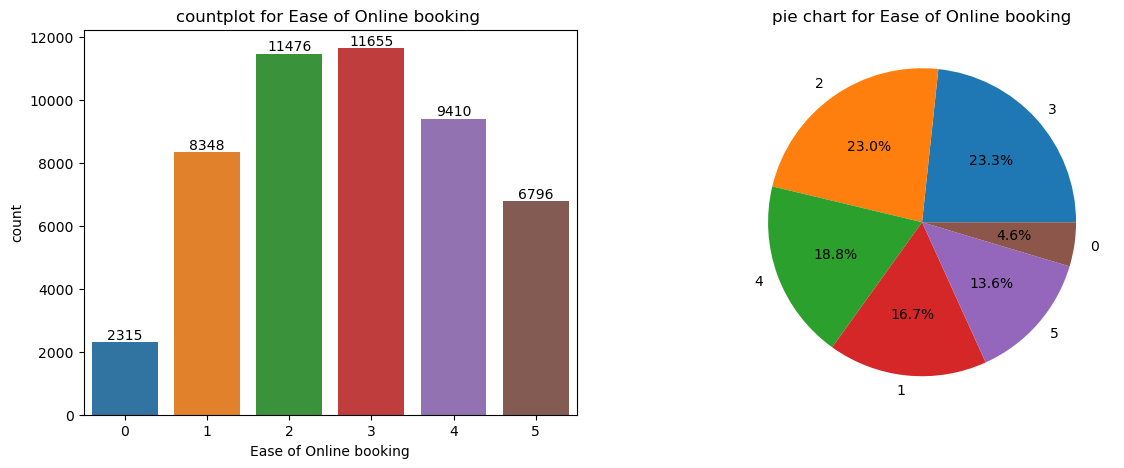

**************************************************
value_counts for category Gate location

3    13712
4    11689
2     9255
1     8534
5     6810
Name: Gate location, dtype: int64
**************************************************


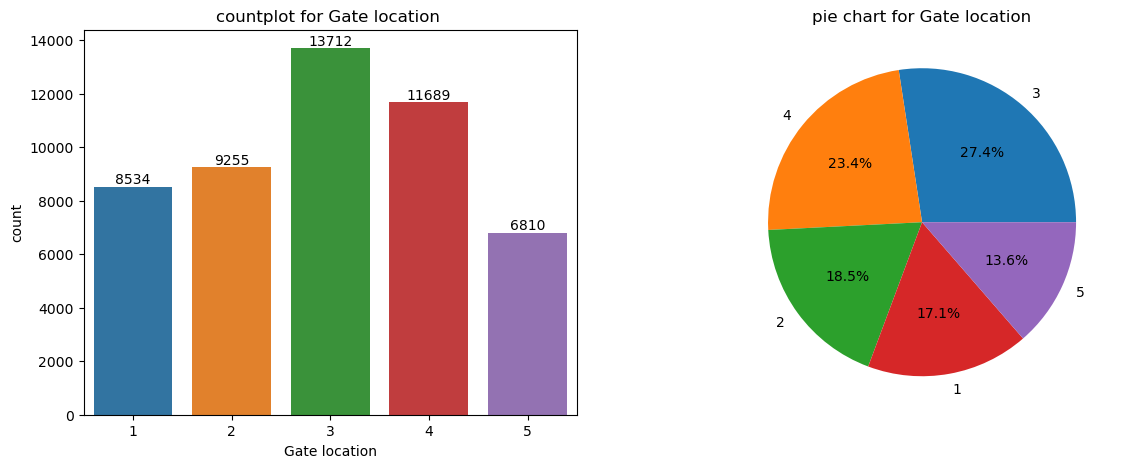

**************************************************
value_counts for category Food and drink

4    11678
3    10741
5    10731
2    10649
1     6139
0       62
Name: Food and drink, dtype: int64
**************************************************


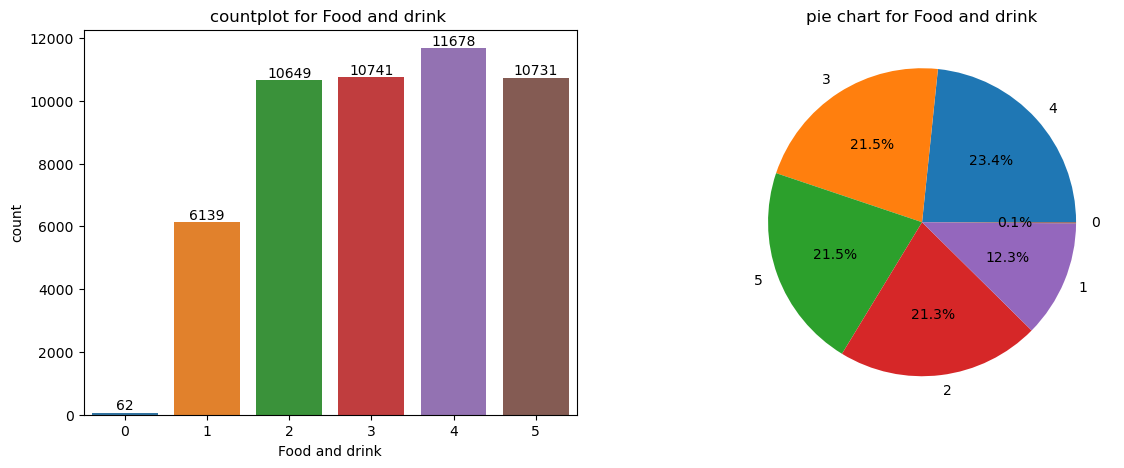

**************************************************
value_counts for category Online boarding

4    14873
3    10455
5     9997
2     8400
1     5031
0     1244
Name: Online boarding, dtype: int64
**************************************************


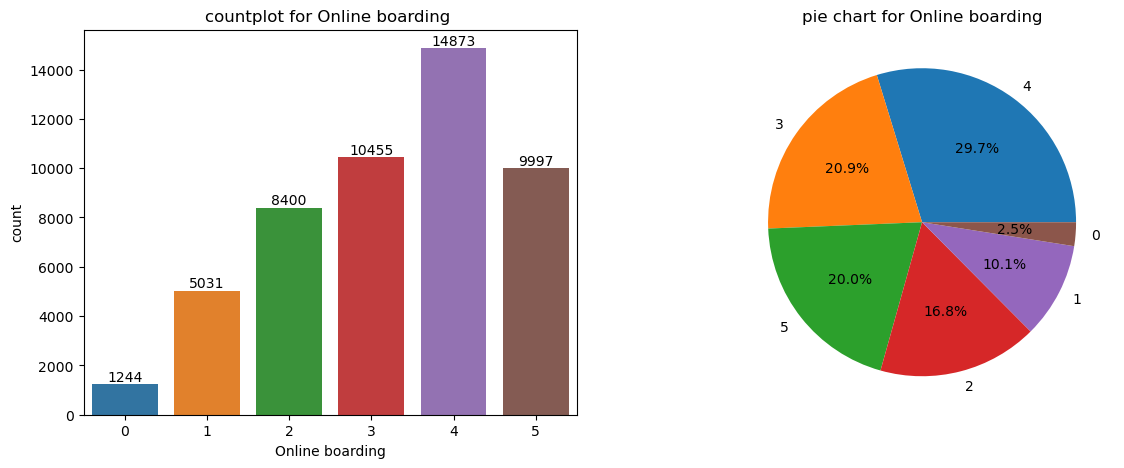

**************************************************
value_counts for category Seat comfort

4    15269
5    12765
3     8979
2     7157
1     5829
0        1
Name: Seat comfort, dtype: int64
**************************************************


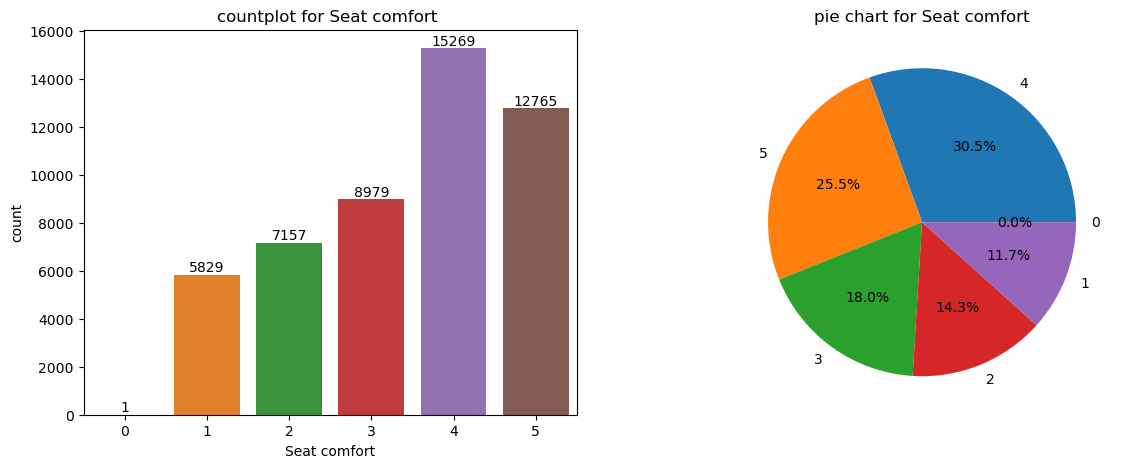

**************************************************
value_counts for category Inflight entertainment

4    14059
5    12218
3     9223
2     8432
1     6060
0        8
Name: Inflight entertainment, dtype: int64
**************************************************


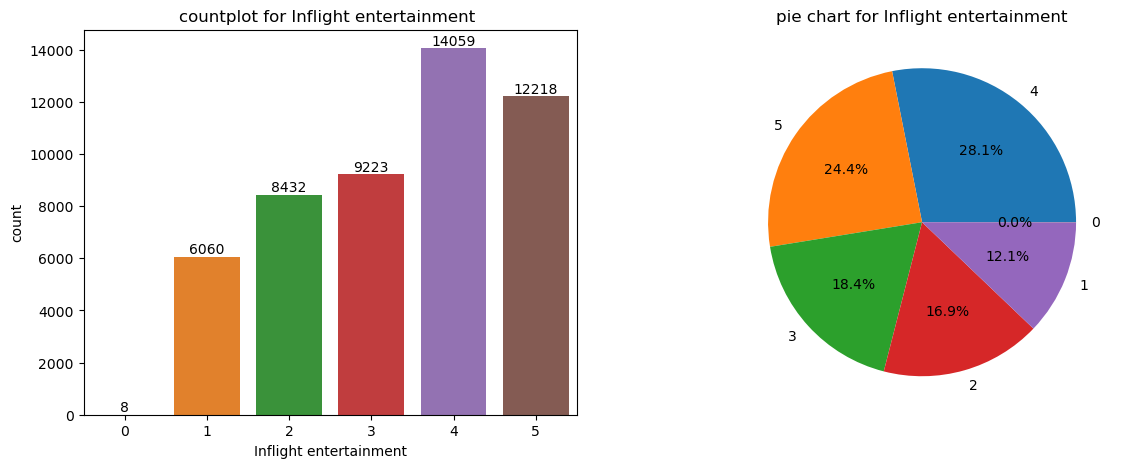

**************************************************
value_counts for category On-board service

4    14860
5    11532
3    11097
2     6958
1     5551
0        2
Name: On-board service, dtype: int64
**************************************************


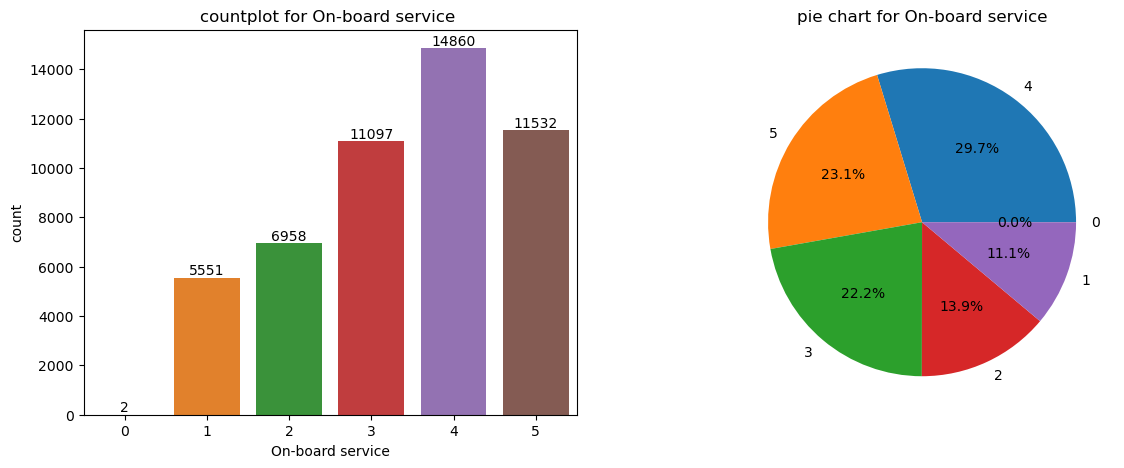

**************************************************
value_counts for category Leg room service

4    13908
5    12032
3     9601
2     9308
1     4898
0      253
Name: Leg room service, dtype: int64
**************************************************


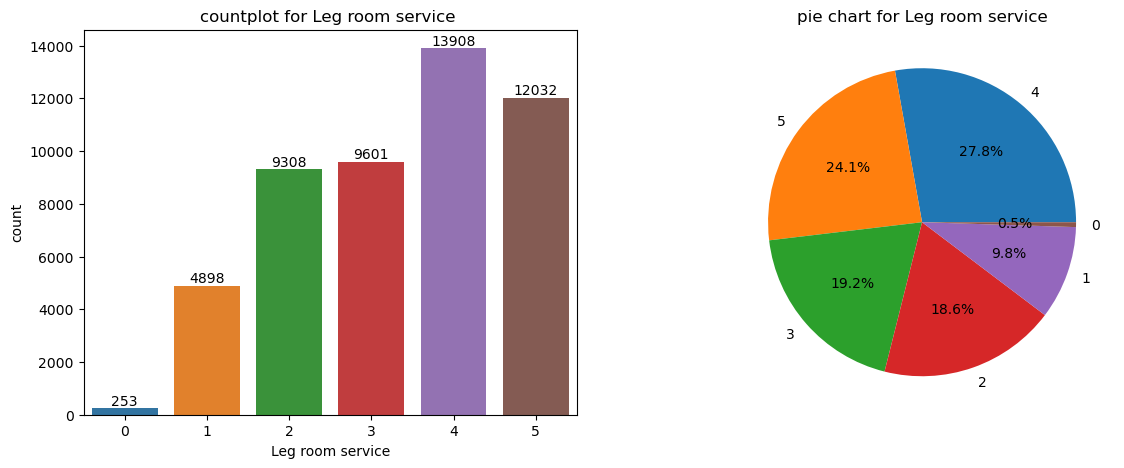

**************************************************
value_counts for category Baggage handling

4    18091
5    13179
3     9846
2     5416
1     3468
Name: Baggage handling, dtype: int64
**************************************************


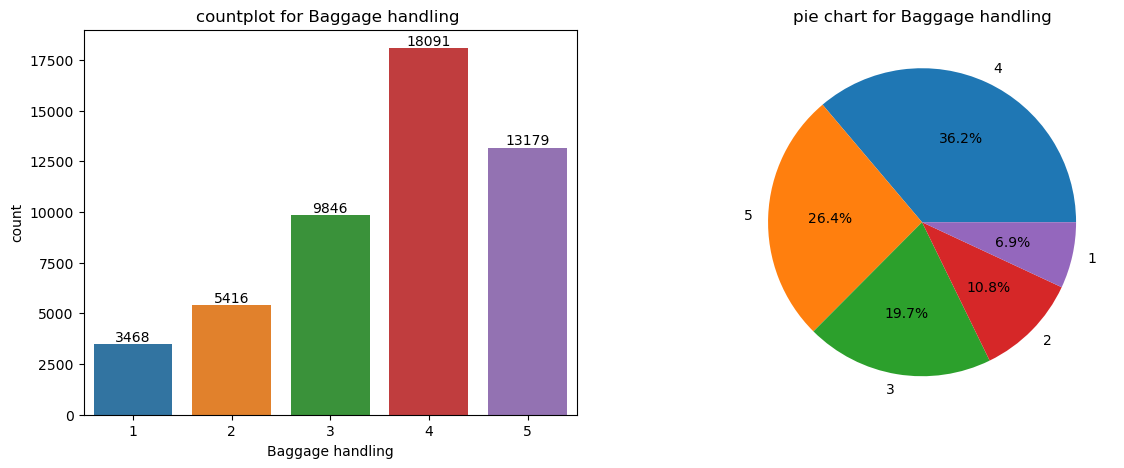

**************************************************
value_counts for category Checkin service

4    14161
3    13704
5    10020
2     6095
1     6019
0        1
Name: Checkin service, dtype: int64
**************************************************


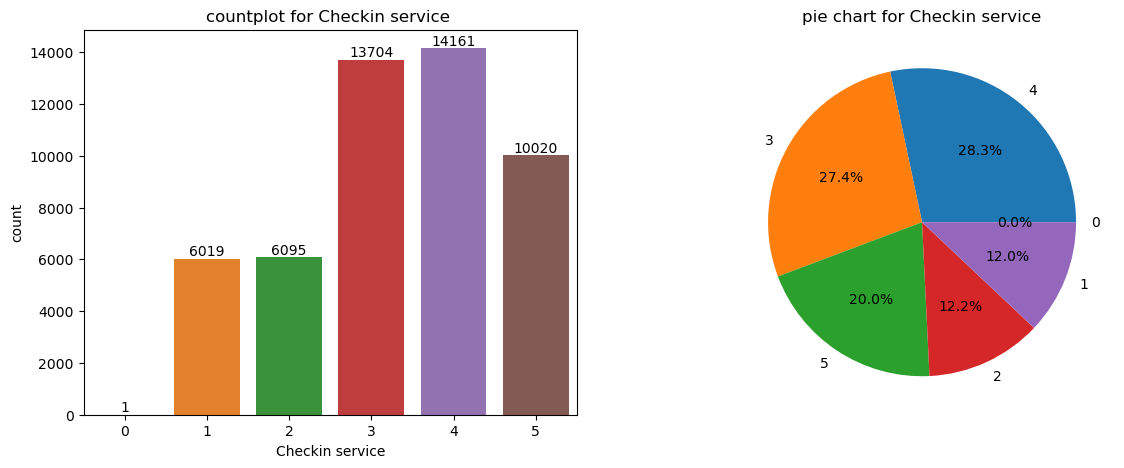

**************************************************
value_counts for category Inflight service

4    18296
5    13345
3     9682
2     5344
1     3331
0        2
Name: Inflight service, dtype: int64
**************************************************


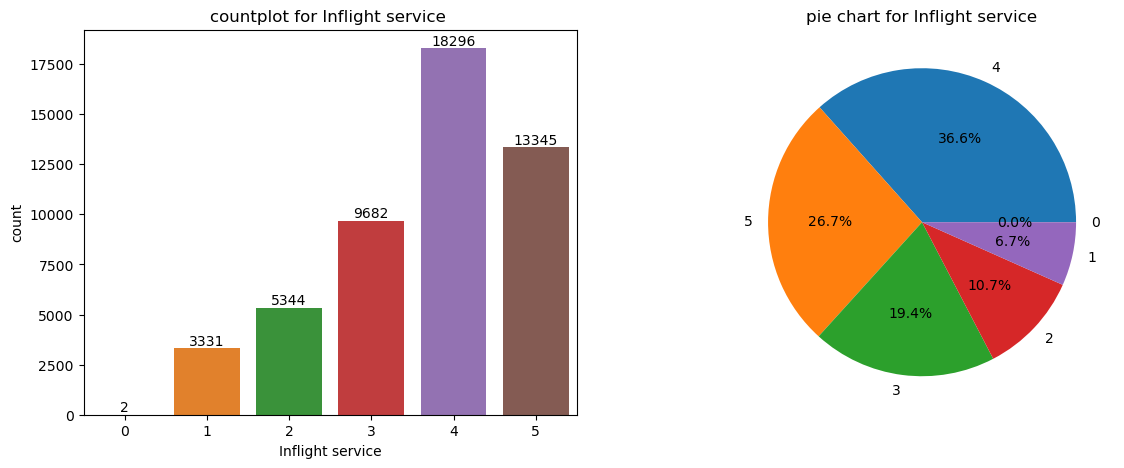

**************************************************
value_counts for category Cleanliness

4    12967
3    11896
5    10965
2     7704
1     6461
0        7
Name: Cleanliness, dtype: int64
**************************************************


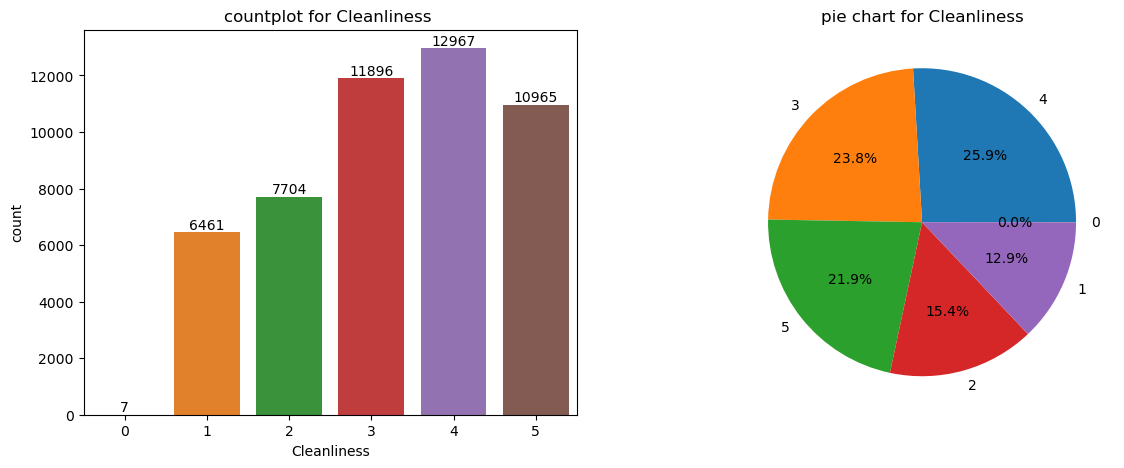

**************************************************
value_counts for category satisfaction

neutral or dissatisfied    28322
satisfied                  21678
Name: satisfaction, dtype: int64
**************************************************


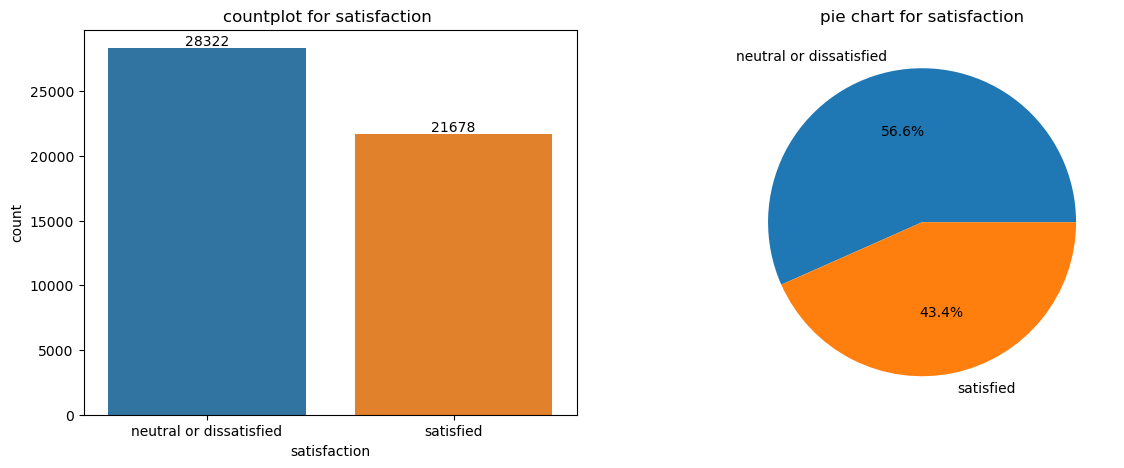

In [13]:
for col in categorical_col:
    plt.figure(figsize=[14,5]) # Definning figure size
    plt.subplot(1,2,1) #subplot 1
    print("*"*50) #printing seperator line
    print("value_counts for category {}\n".format(col))
    print(data[col].value_counts()) #value count for each category
    print("*"*50) #printing seperator line
    plt.title("countplot for {} ".format(col)) #Giving the title on top
    ax=sns.countplot(data=data,x=col)  #countplot for categorical columns

    for label in ax.containers:
      ax.bar_label(label)

    plt.subplot(1,2,2) #subplot 2
    plt.title("pie chart for {}".format(col))   #Giving the title on top
    mylabel=data[col].value_counts().index  #indexes for piechart
    y=data[col].value_counts().values   #values for index
    plt.pie(y,labels=mylabel,autopct="%1.1f%%") #pie chart for categorical columns

    plt.show();  #To remove the array in output  using plt.show();

**************************************************
value_counts for category Gender

Female    25224
Male      24776
Name: Gender, dtype: int64


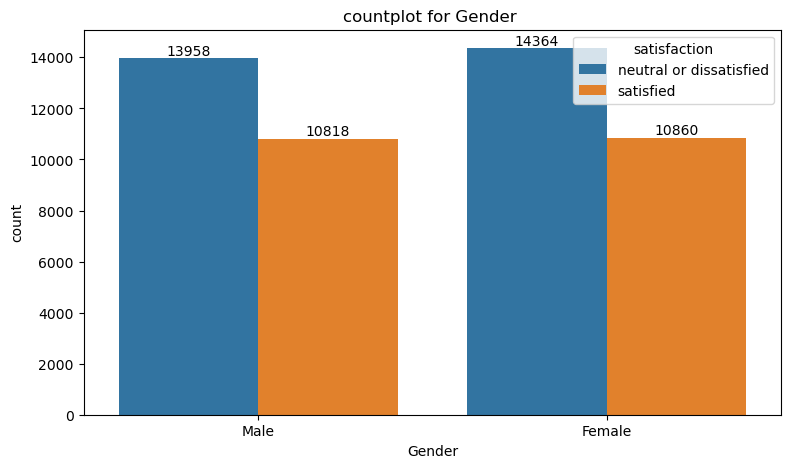

**************************************************
value_counts for category Customer Type

Loyal Customer       40883
disloyal Customer     9117
Name: Customer Type, dtype: int64


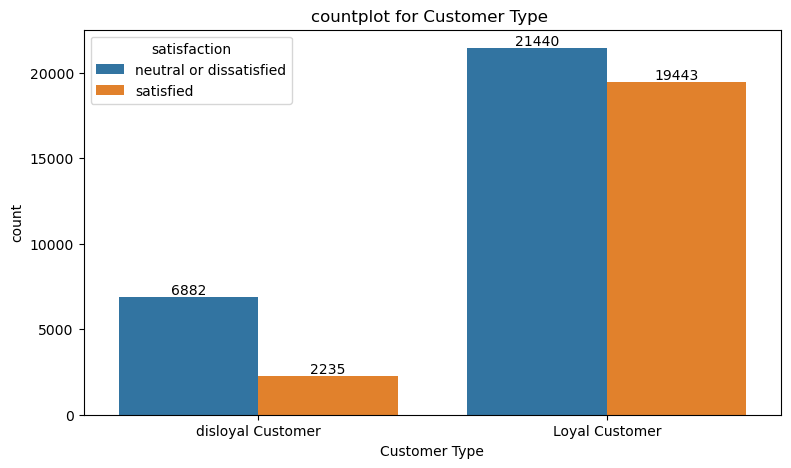

**************************************************
value_counts for category Type of Travel

Business travel    34598
Personal Travel    15402
Name: Type of Travel, dtype: int64


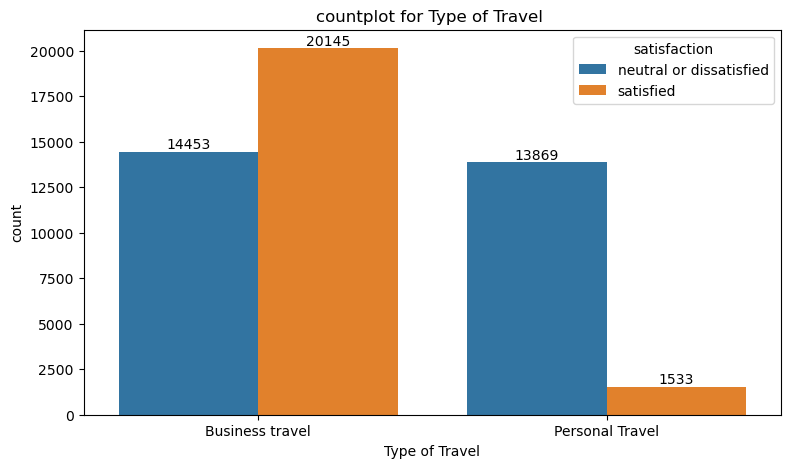

**************************************************
value_counts for category Class

Business    24513
Eco         21996
Eco Plus     3491
Name: Class, dtype: int64


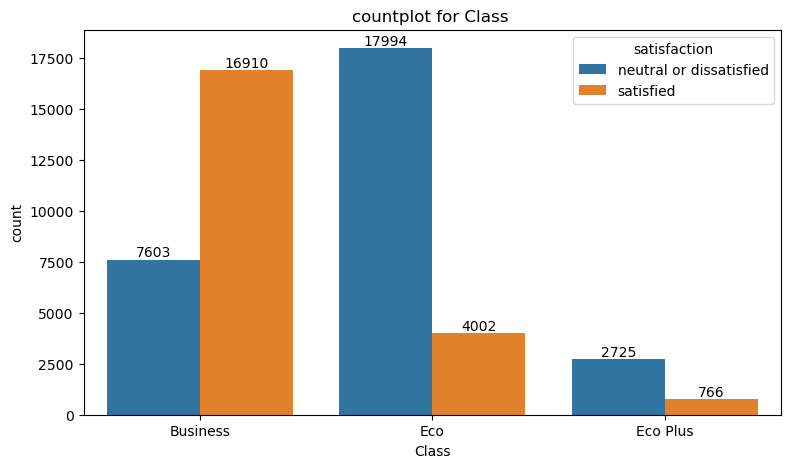

**************************************************
value_counts for category Inflight wifi service

2    12447
3    12445
4     9466
1     8620
5     5493
0     1529
Name: Inflight wifi service, dtype: int64


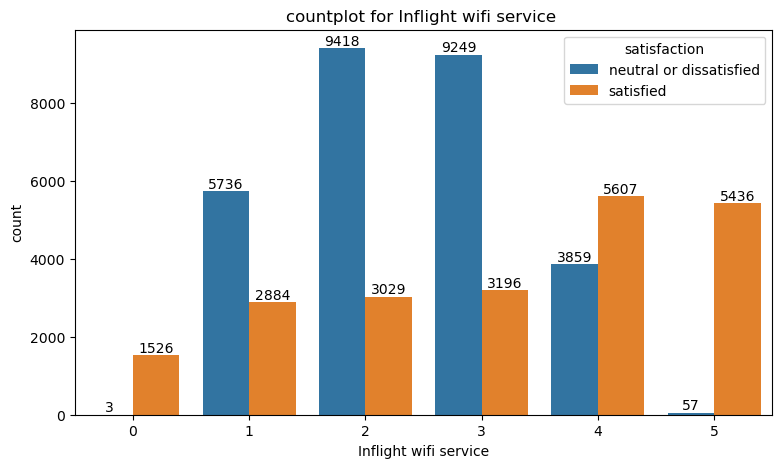

**************************************************
value_counts for category Departure/Arrival time convenient

4    12264
5    10800
3     8717
2     8203
1     7433
0     2583
Name: Departure/Arrival time convenient, dtype: int64


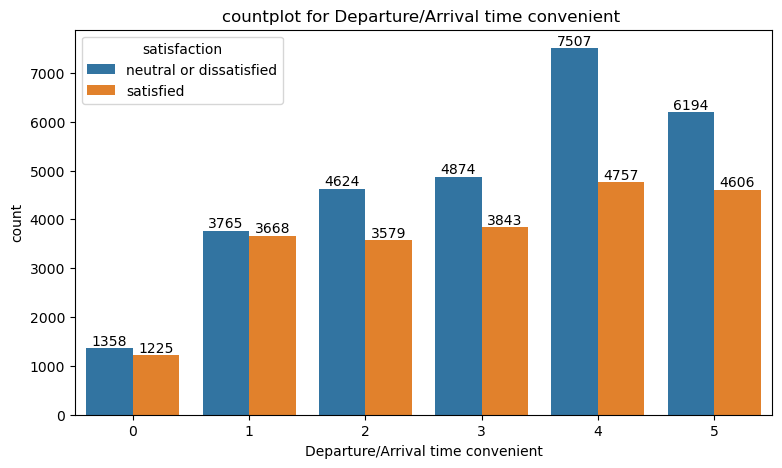

**************************************************
value_counts for category Ease of Online booking

3    11655
2    11476
4     9410
1     8348
5     6796
0     2315
Name: Ease of Online booking, dtype: int64


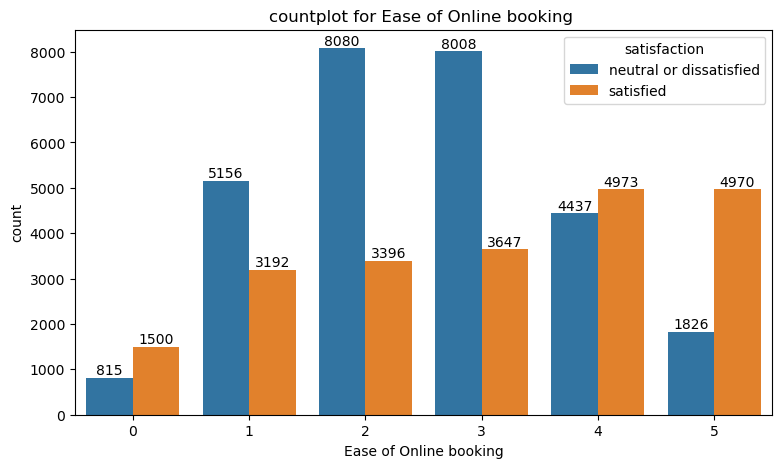

**************************************************
value_counts for category Gate location

3    13712
4    11689
2     9255
1     8534
5     6810
Name: Gate location, dtype: int64


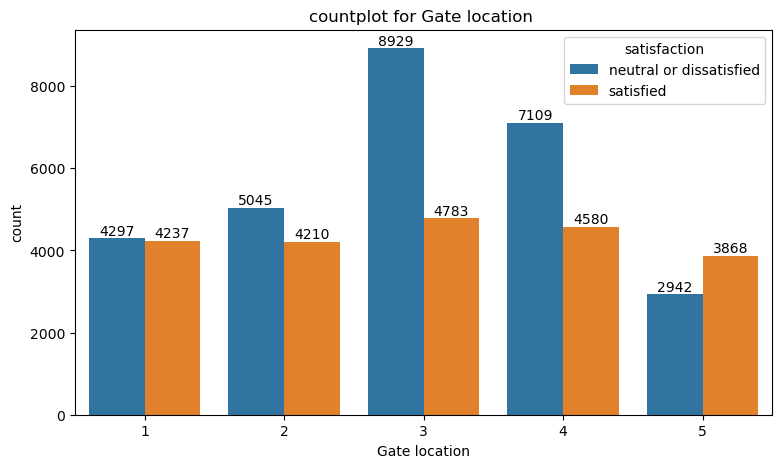

**************************************************
value_counts for category Food and drink

4    11678
3    10741
5    10731
2    10649
1     6139
0       62
Name: Food and drink, dtype: int64


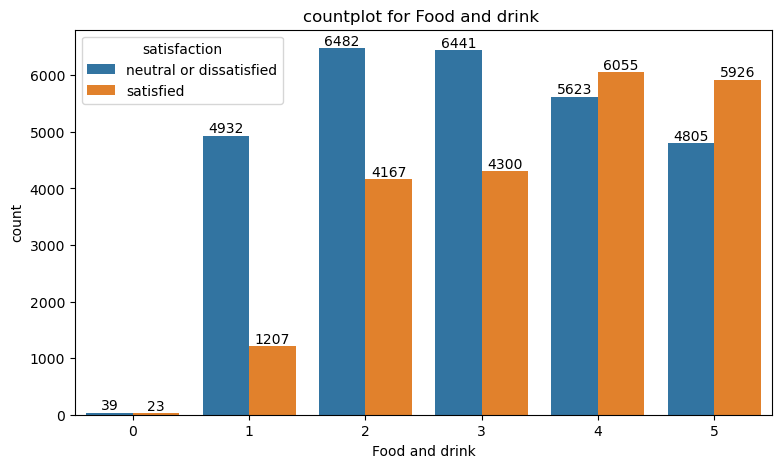

**************************************************
value_counts for category Online boarding

4    14873
3    10455
5     9997
2     8400
1     5031
0     1244
Name: Online boarding, dtype: int64


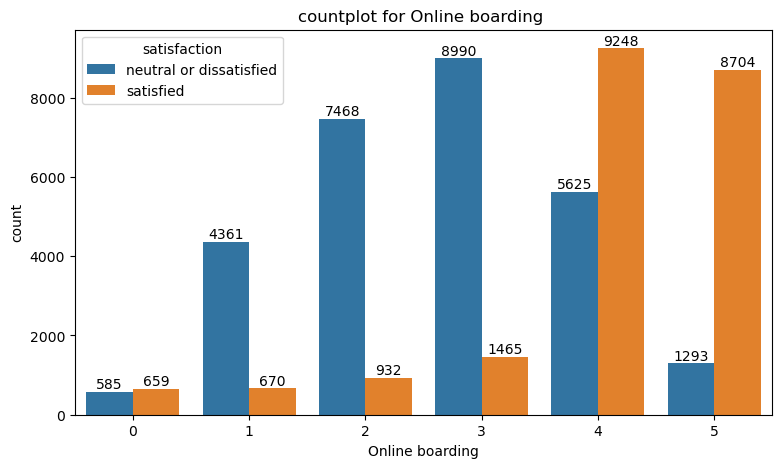

**************************************************
value_counts for category Seat comfort

4    15269
5    12765
3     8979
2     7157
1     5829
0        1
Name: Seat comfort, dtype: int64


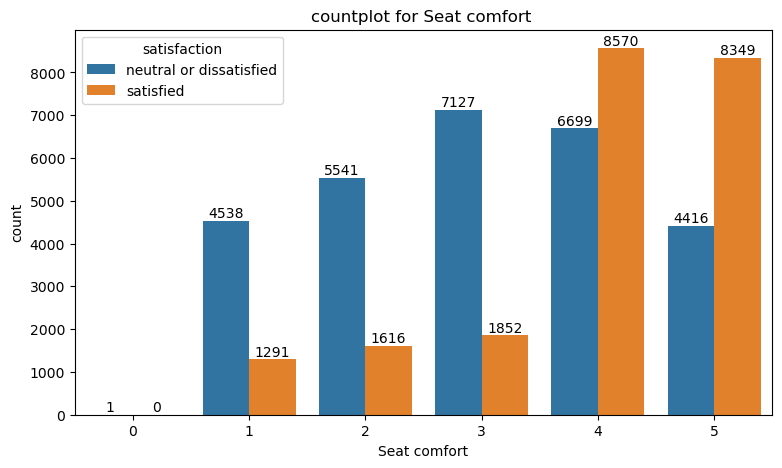

**************************************************
value_counts for category Inflight entertainment

4    14059
5    12218
3     9223
2     8432
1     6060
0        8
Name: Inflight entertainment, dtype: int64


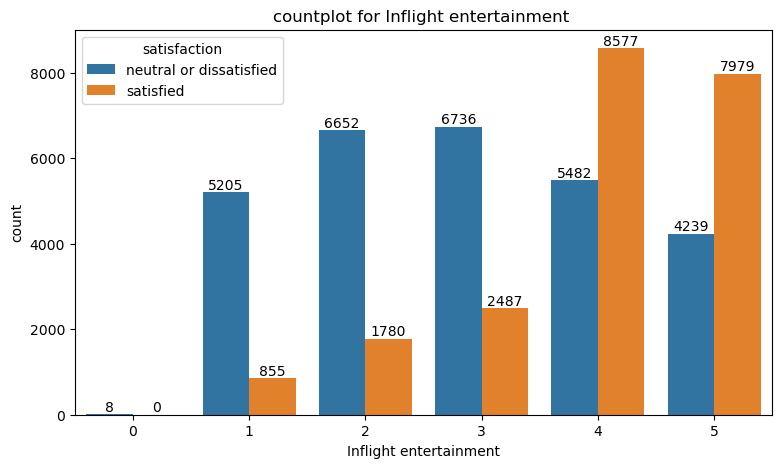

**************************************************
value_counts for category On-board service

4    14860
5    11532
3    11097
2     6958
1     5551
0        2
Name: On-board service, dtype: int64


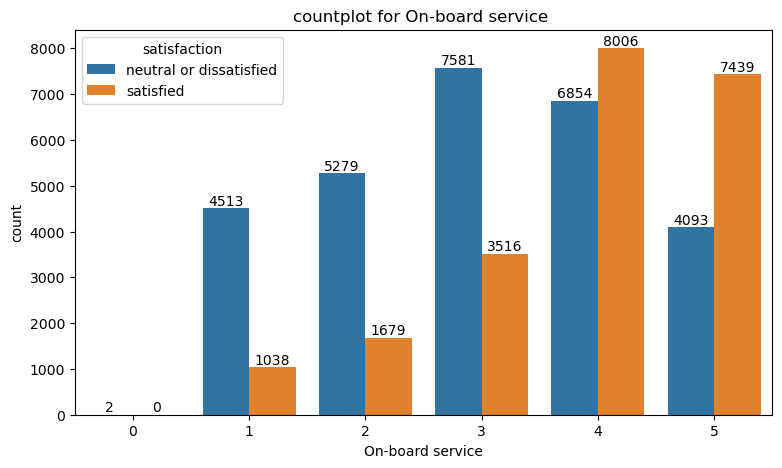

**************************************************
value_counts for category Leg room service

4    13908
5    12032
3     9601
2     9308
1     4898
0      253
Name: Leg room service, dtype: int64


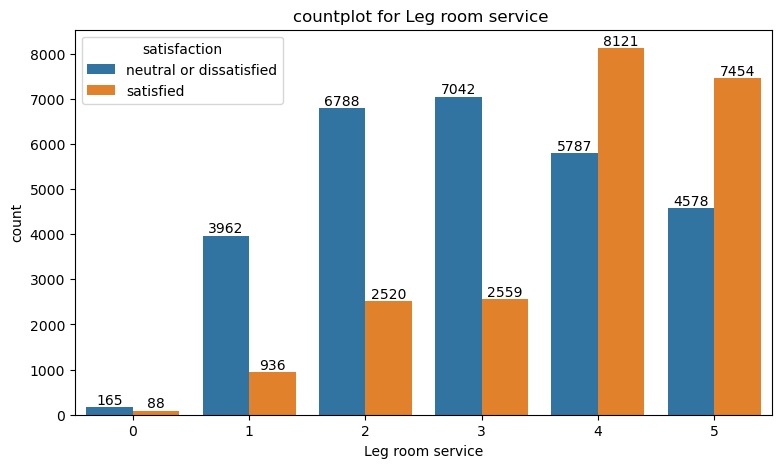

**************************************************
value_counts for category Baggage handling

4    18091
5    13179
3     9846
2     5416
1     3468
Name: Baggage handling, dtype: int64


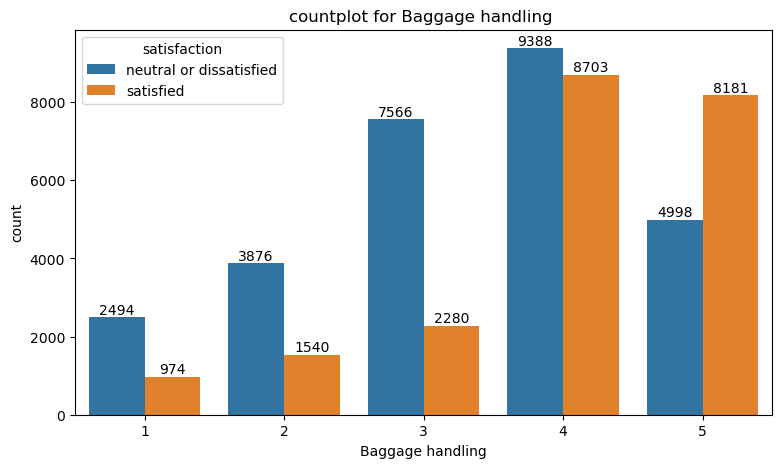

**************************************************
value_counts for category Checkin service

4    14161
3    13704
5    10020
2     6095
1     6019
0        1
Name: Checkin service, dtype: int64


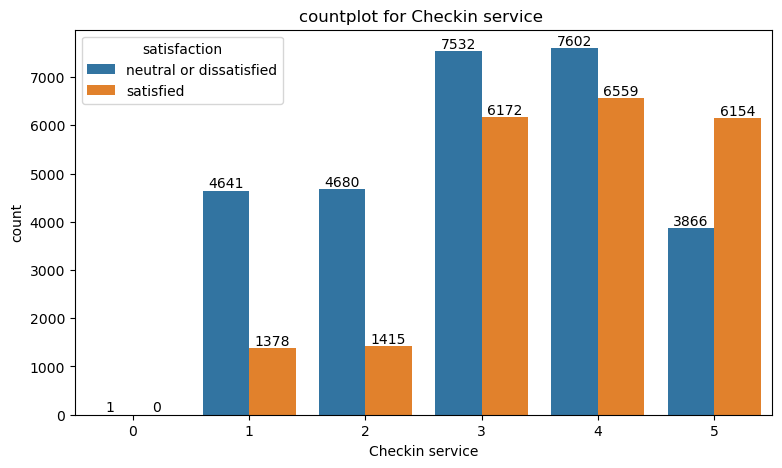

**************************************************
value_counts for category Inflight service

4    18296
5    13345
3     9682
2     5344
1     3331
0        2
Name: Inflight service, dtype: int64


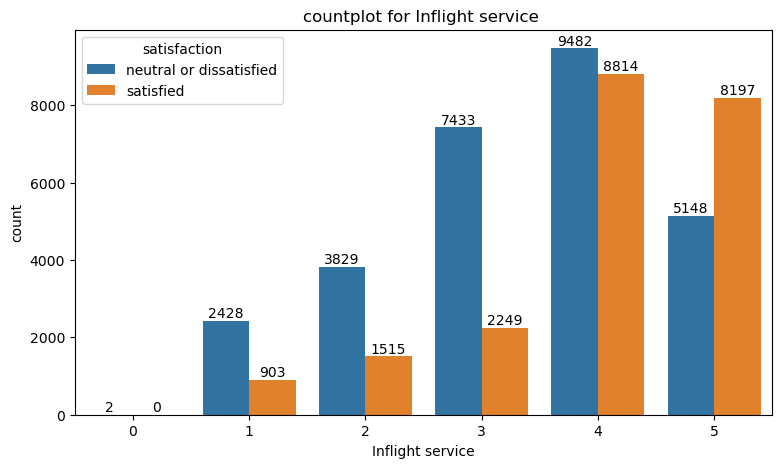

**************************************************
value_counts for category Cleanliness

4    12967
3    11896
5    10965
2     7704
1     6461
0        7
Name: Cleanliness, dtype: int64


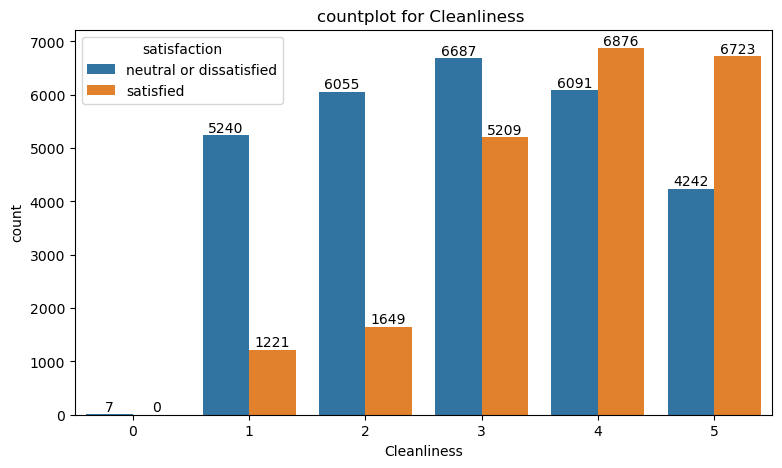

**************************************************
value_counts for category satisfaction

neutral or dissatisfied    28322
satisfied                  21678
Name: satisfaction, dtype: int64


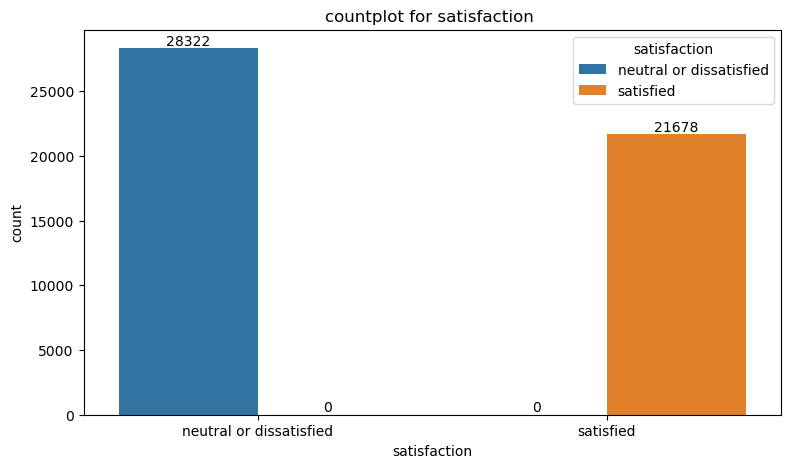

In [14]:
for col in categorical_col:
    plt.figure(figsize=[9,5]) # Definning figure size
    print("*"*50) #printing seperator line
    print("value_counts for category {}\n".format(col))
    print(data[col].value_counts()) #value count for each category
    plt.title("countplot for {} ".format(col)) #Giving the title on top
    ax=sns.countplot(data=data,x=col,hue="satisfaction")  #countplot for categorical columns
    for label in ax.containers: #adding labels in bars
     ax.bar_label(label)
    plt.show();

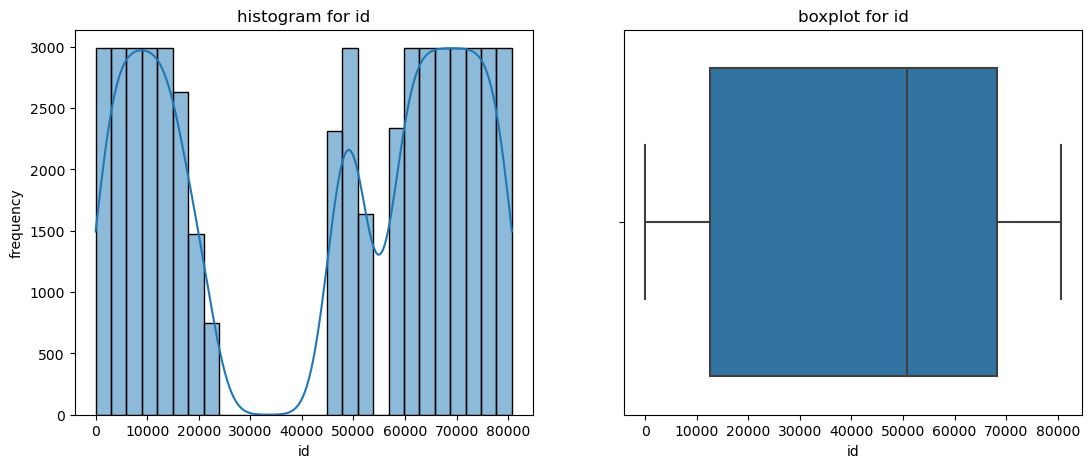

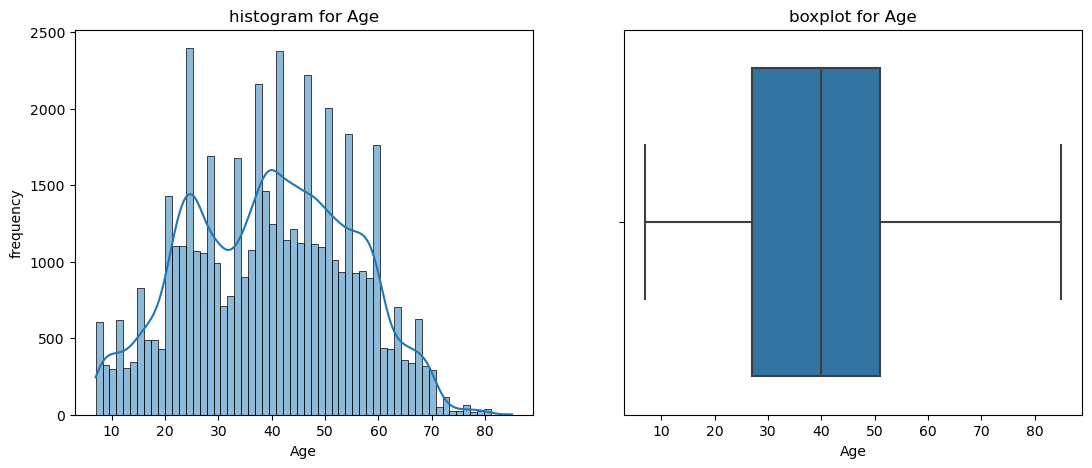

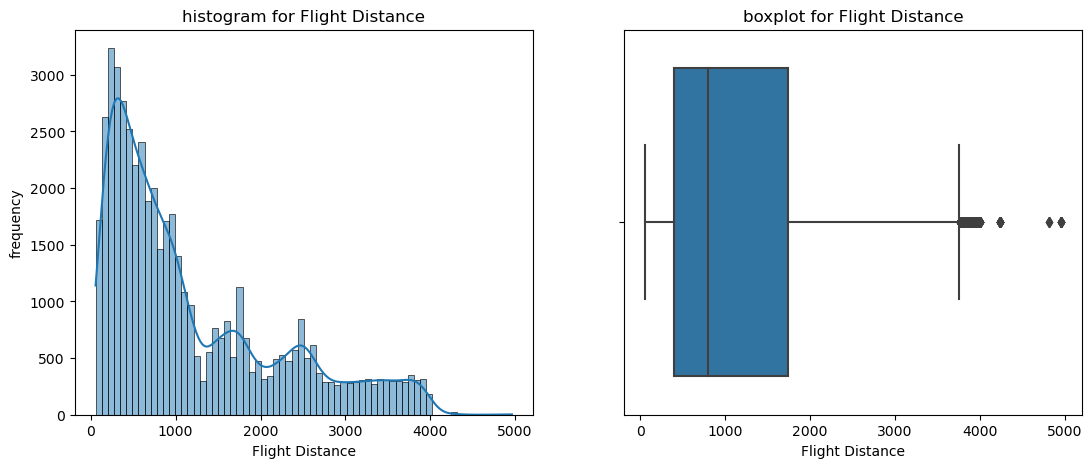

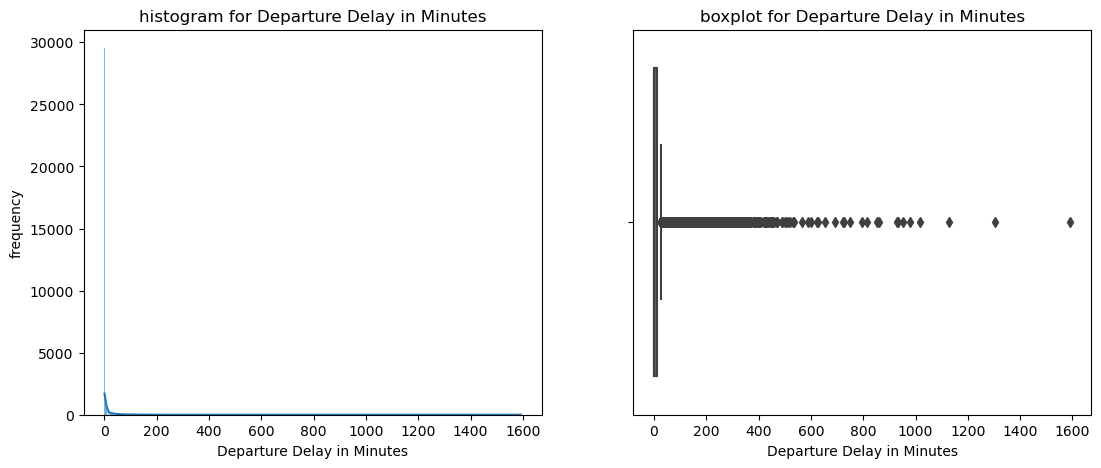

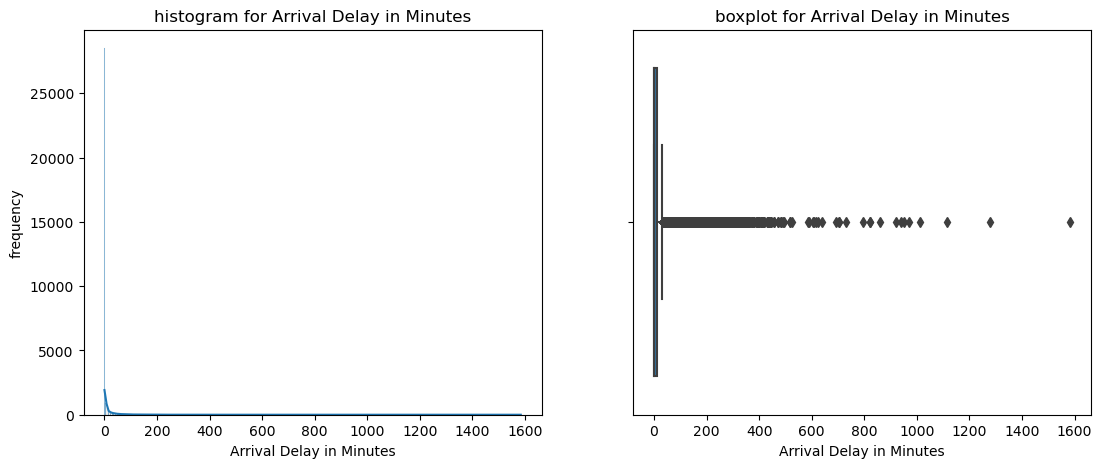

In [15]:
for col in continuous_col:
    plt.figure(figsize=[13,5])   #defining figure size
    plt.subplot(1,2,1)  #subplot 1 for histplot
    plt.title("histogram for {}".format(col))   #giving title to histograms
    plt.ylabel("frequency".format(col))
    plt.xlabel(col)  #giving name to x axis
    sns.histplot(data,x=data[col],kde=True) #Histogram distribution for continuous columns
    plt.subplot(1,2,2)  #subplot 2 for histplot
    plt.title("boxplot for {}".format(col))   #giving title to boxplot
    plt.xlabel(col)
    sns.boxplot(data,x=data[col]) #Histogram distribution for continuous columns


    plt.show();

In [16]:
data.corr(numeric_only=True)

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,-0.008693,0.174666,0.006119,-0.000167,0.018668,-0.000645,0.009783,0.022417,0.022435,0.002797,0.026891,0.020973,0.026491,0.039971,0.036941,0.013941,-0.046657,-0.062128
Age,-0.008693,1.000000,0.107022,0.018643,0.035568,0.028519,0.004048,0.025803,0.215416,0.163379,0.077867,0.055552,0.036765,-0.052254,0.029916,-0.056764,0.055811,-0.018958,-0.019213
Flight Distance,0.174666,0.107022,1.000000,-0.003232,-0.023892,0.064040,0.003391,0.060125,0.221510,0.161628,0.136245,0.120641,0.142241,0.075236,0.083345,0.070887,0.094740,-0.006117,-0.011454
Inflight wifi service,0.006119,0.018643,-0.003232,1.000000,0.340627,0.715936,0.345794,0.125596,0.447334,0.117407,0.203683,0.124338,0.163955,0.127183,0.043737,0.118965,0.124912,-0.018795,-0.020550
Departure/Arrival time convenient,-0.000167,0.035568,-0.023892,0.340627,1.000000,0.426655,0.451719,0.005621,0.069245,0.015027,-0.006656,0.064473,0.009714,0.068471,0.093763,0.068722,0.015483,0.001887,0.000322
Ease of Online booking,0.018668,0.028519,0.064040,0.715936,0.426655,1.000000,0.461283,0.033123,0.403076,0.028897,0.047145,0.041237,0.116799,0.040991,0.008379,0.035904,0.015844,-0.007036,-0.007474
Gate location,-0.000645,0.004048,0.003391,0.345794,0.451719,0.461283,1.000000,-0.000653,0.005558,0.003729,0.003295,-0.028585,-0.002697,-0.002130,-0.031452,0.000528,-0.003250,0.008733,0.008184
Food and drink,0.009783,0.025803,0.060125,0.125596,0.005621,0.033123,-0.000653,1.000000,0.233921,0.578058,0.620686,0.063658,0.033936,0.041672,0.093846,0.042721,0.657044,-0.036048,-0.038961
Online boarding,0.022417,0.215416,0.221510,0.447334,0.069245,0.403076,0.005558,0.233921,1.000000,0.423134,0.284340,0.157645,0.130738,0.087305,0.206373,0.080304,0.329716,-0.025972,-0.026825
Seat comfort,0.022435,0.163379,0.161628,0.117407,0.015027,0.028897,0.003729,0.578058,0.423134,1.000000,0.613458,0.134850,0.102426,0.081618,0.197684,0.074939,0.682278,-0.033923,-0.035709


<Axes: >

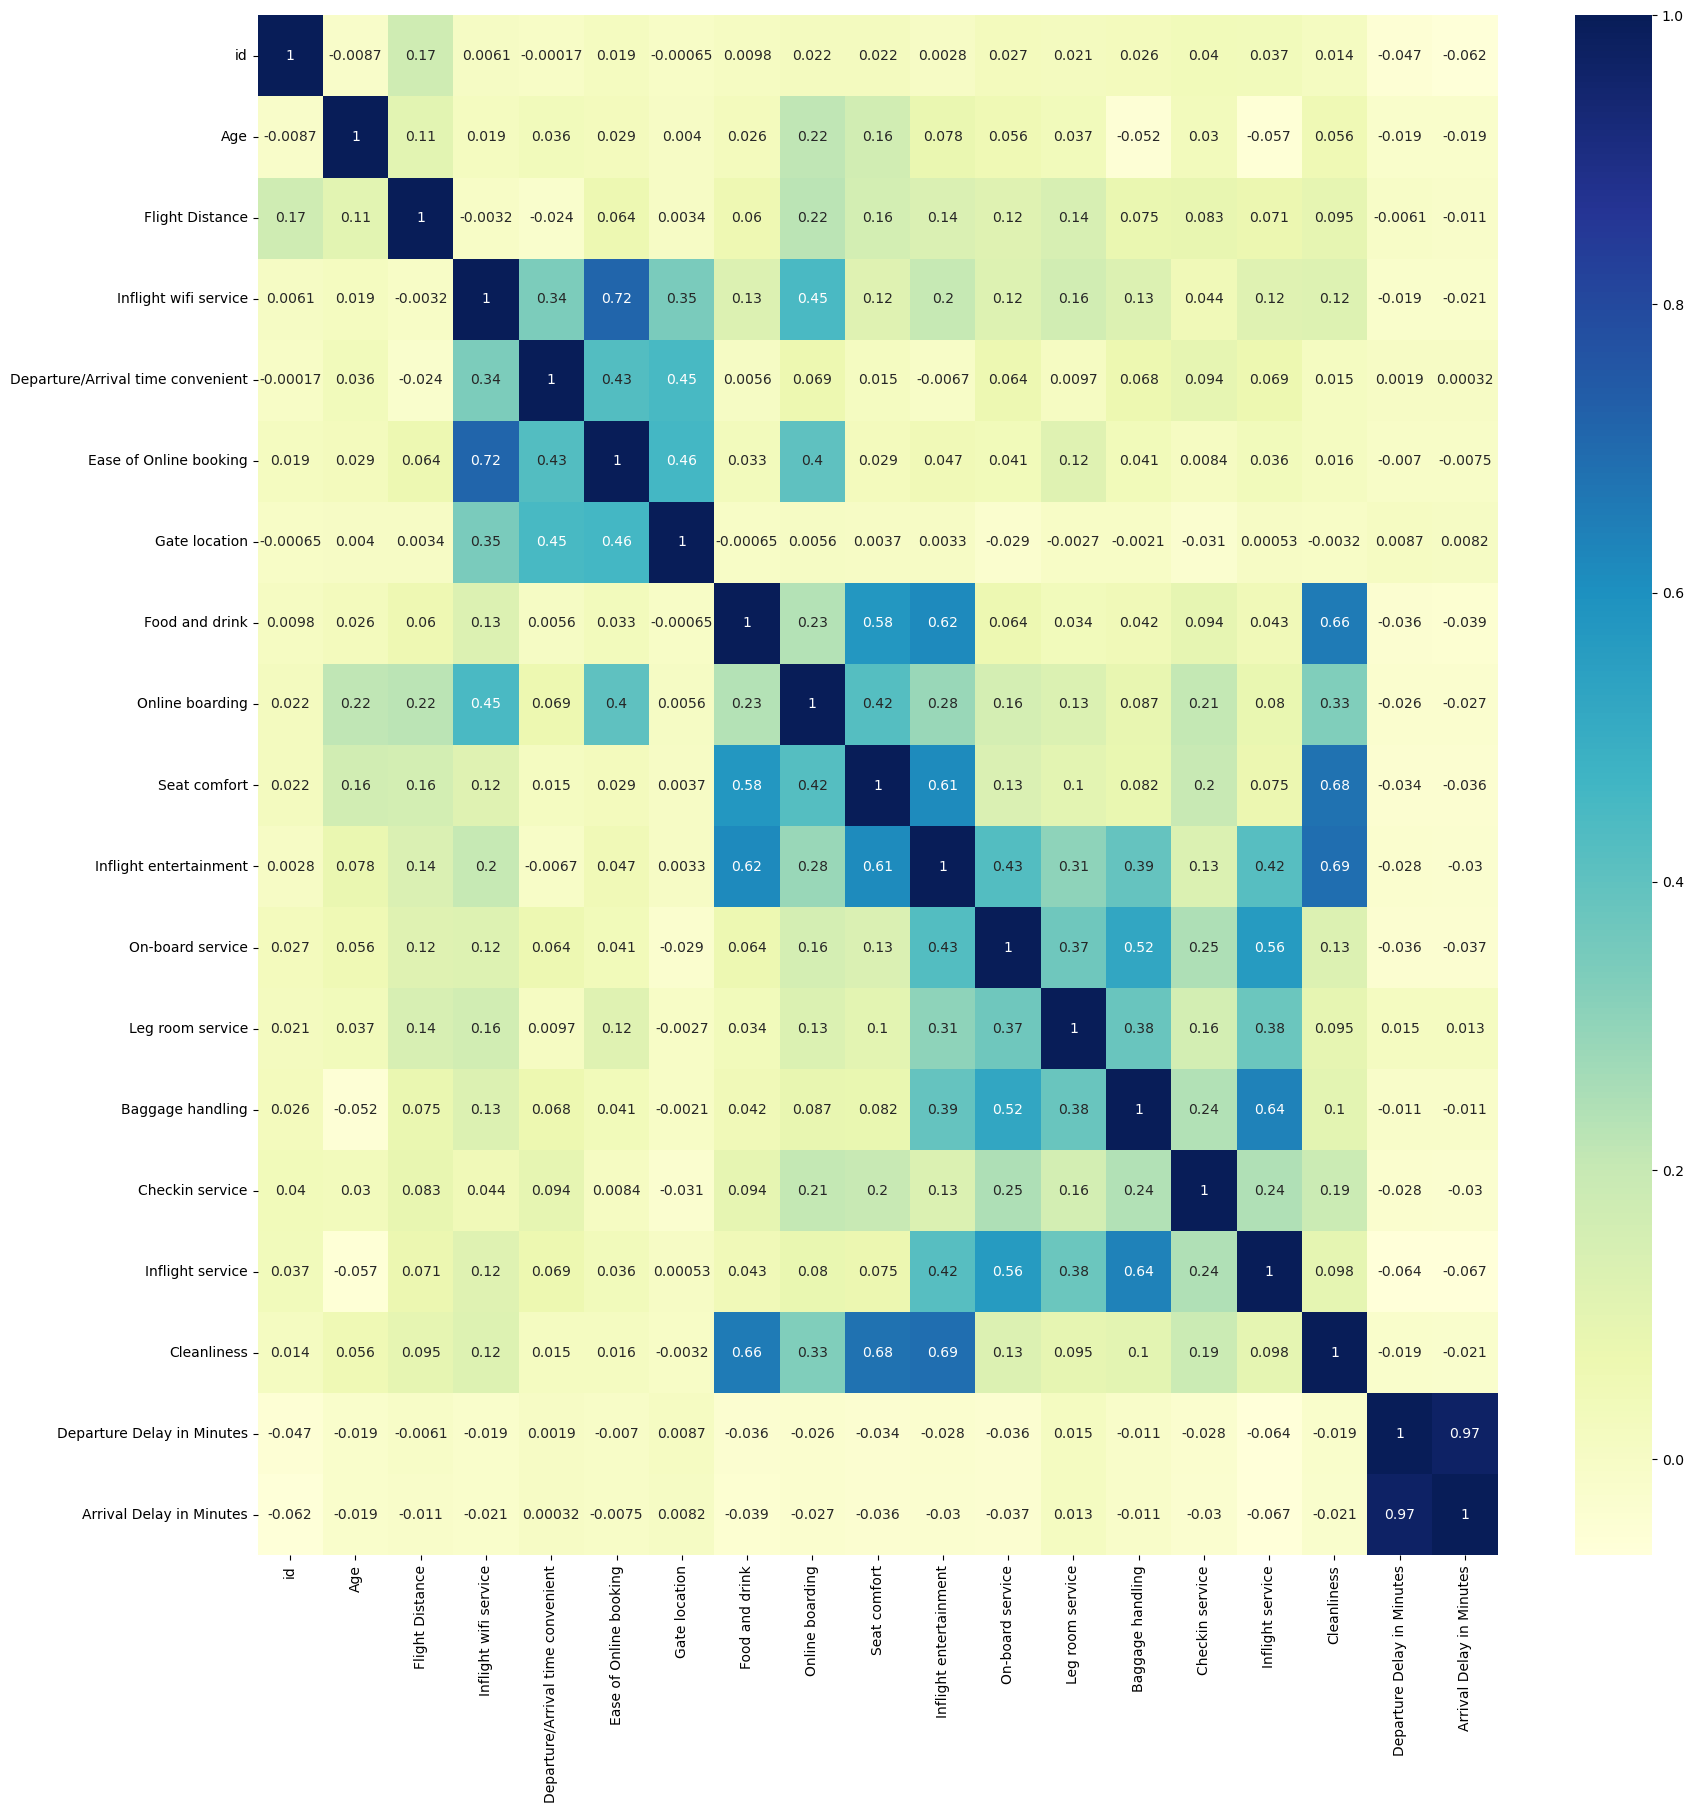

In [17]:
plt.figure(figsize=[20,20]) #defining figure size
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="YlGnBu")   #heatmap to show correlation between features

In [18]:
from sklearn.preprocessing import LabelEncoder  #imporing labelencoder from sklearn
encoder=LabelEncoder()  #assigning labelencoder to encoder

In [19]:
for col in data.columns:
    if data[col].dtypes=="object":
        data[col]=encoder.fit_transform(data[col])

In [20]:
#checking if encoding done
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,1,48,0,0,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
1,2,0,0,35,0,0,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
2,3,1,0,41,0,0,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
3,4,1,0,50,0,0,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
4,5,0,0,49,0,0,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,80712,0,0,33,0,0,920,3,3,5,...,1,1,2,1,3,1,3,0,5.0,1
49996,80713,0,1,24,0,1,920,3,3,3,...,3,2,3,4,2,4,3,0,0.0,0
49997,80714,1,0,37,0,0,2483,2,2,2,...,2,2,1,2,3,2,2,0,1.0,0
49998,80715,0,0,22,0,0,3001,1,4,4,...,1,4,2,3,3,4,1,7,14.0,0


In [21]:
#importing train test split from sklearn.model_selection
from sklearn.model_selection import train_test_split
x=data.drop(["satisfaction"],axis=1) #input data to model except result "satisfaction"
y=data["satisfaction"]   #satisfaction is prediction
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)   #defining training and test data, test size=0.2 means test data will be 20%.

In [22]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.20)   #defining training and val data, test size=0.2 means test data will be 20%.

In [23]:
#importing standard scaler to scale features
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [24]:
x_train=scale.fit_transform(x_train)    #scaling training data by standard scaler
x_test=scale.transform(x_test)  #transforming scale into test data
x_val=scale.transform(x_val)  #transforming scale into test data

In [25]:
#loading training data to check if it scaled or not
x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape

((32000, 23), (8000, 23), (10000, 23), (32000,), (8000,), (10000,))

# Logistic Regression

In [26]:
#importing logistic regression to create a model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [27]:
#Giving training to model by training data
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
#predicting results on test data
y_pred_train=model.predict(x_train)
y_pred_val=model.predict(x_val)
y_pred_test=model.predict(x_test)

In [29]:
#importing confusion_matrix,classificatio_report and accuracy_report from metrics to check model performance
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
class_report_test=classification_report(y_test,y_pred_test)   #to get classification reprt
acc_scr_test=accuracy_score(y_test,y_pred_test)*100   #to get accuracty_score
con_matrix_test=confusion_matrix(y_test,y_pred_test)  #to get confusion_,atrix

class_report_train=classification_report(y_train,y_pred_train)   #to get classification reprt
acc_scr_train=accuracy_score(y_train,y_pred_train)*100   #to get accuracty_score
con_matrix_train=confusion_matrix(y_train,y_pred_train)  #to get confusion_,atrix

class_report_val=classification_report(y_val,y_pred_val)   #to get classification reprt
acc_scr_val=accuracy_score(y_val,y_pred_val)*100   #to get accuracty_score
con_matrix_val=confusion_matrix(y_val,y_pred_val)  #to get confusion_,atrix

In [30]:
print(class_report_test)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5638
           1       0.87      0.84      0.86      4362

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



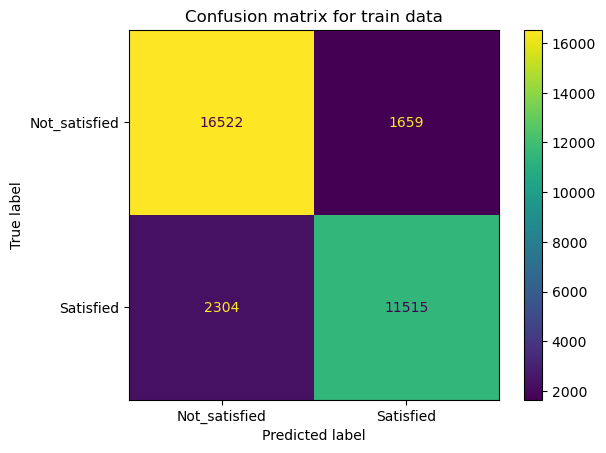

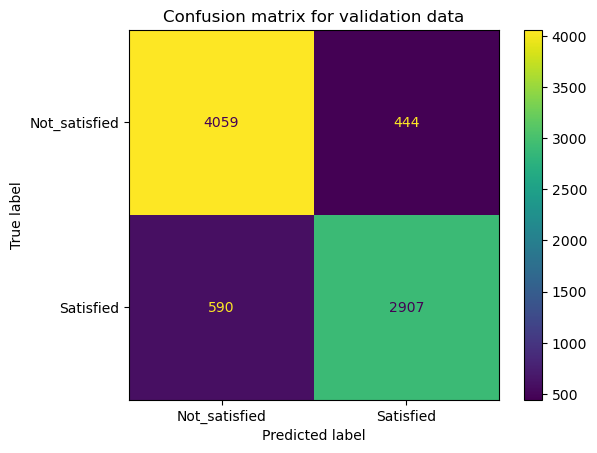

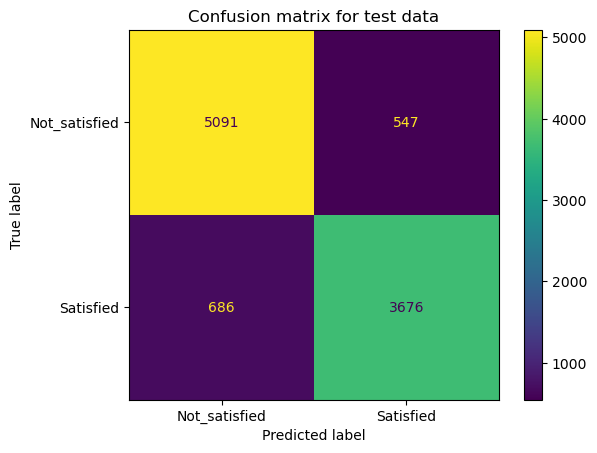

In [31]:
#confusion matrics
class_names=["Not_satisfied","Satisfied"]
from sklearn.metrics import ConfusionMatrixDisplay

#confusion matrix for train data
conf_train_disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix_train,display_labels=class_names)
conf_train_disp.plot()
plt.title("Confusion matrix for train data")

#confusion matrix for validation data
conf_val_disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix_val,display_labels=class_names)
conf_val_disp.plot()
plt.title("Confusion matrix for validation data")

#confusion matrix for test data
conf_test_disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix_test,display_labels=class_names)
conf_test_disp.plot()
plt.title("Confusion matrix for test data")

plt.show();

In [32]:
print(f"accuracy score for train data is {acc_scr_train}%")

print(f"accuracy score for val data is {acc_scr_val}%")

print(f"accuracy score for test data is {acc_scr_test}%")

accuracy score for train data is 87.615625%
accuracy score for val data is 87.075%
accuracy score for test data is 87.67%


# Grid Search CV

In [33]:
from sklearn.model_selection import GridSearchCV    #importing gridsearchcv
penalty=["l1","l2","elasticnet",None]
solver=["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
param_grid={"penalty":penalty,
            "solver":solver,
            "fit_intercept":[True,False]
            }
model_grid_search=GridSearchCV(LogisticRegression(),param_grid)

model_grid_search.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [34]:
#to get best_fit_parameter
model_grid_search.best_params_

{'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

In [35]:
#tuning using bestParams
log_reg_grid_tuned=LogisticRegression(fit_intercept=True,penalty="l2",solver="lbfgs")
log_reg_grid_tuned.fit(x_train,y_train) #training with best fit parameter
tuned_prediction_grid=log_reg_grid_tuned.predict(x_test)    #prediction on test data

In [36]:
accuracy_scr_grid_tuned=accuracy_score(tuned_prediction_grid,y_test)*100
#accuracy_score of tuned data
print("accuracy score with gridsearch tuned is: ",accuracy_scr_grid_tuned)

accuracy score with gridsearch tuned is:  87.67


# Random Search CV

In [37]:
from sklearn.model_selection import RandomizedSearchCV  #importing RandomizedSearchCV
solver=["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
param_random={"penalty":["l1","l2","elasticnet",None],
            "fit_intercept":[True,False],
            "solver":solver}
model_random_search=RandomizedSearchCV(LogisticRegression(),param_random)

model_random_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']})

In [38]:
#to get best parameters
model_random_search.best_params_

{'solver': 'saga', 'penalty': 'l1', 'fit_intercept': True}

In [39]:
#tuning using bestParams
log_reg_random_tuned=LogisticRegression(solver="newton-cholesky",fit_intercept=True,penalty=None)
log_reg_random_tuned.fit(x_train,y_train)
tuned_prediction_random=log_reg_random_tuned.predict(x_test)

In [40]:
accuracy_scr_random_tuned=accuracy_score(tuned_prediction_random,y_test)*100
#accuracy_score of tuned data
print("accuracy score with randomsearch tuned is: ",accuracy_scr_random_tuned)

accuracy score with randomsearch tuned is:  87.67


# KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()

In [42]:
#training to model
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
knn_pred_train=knn_model.predict(x_train)
knn_pred_val=knn_model.predict(x_val)
knn_pred_test=knn_model.predict(x_test)

In [44]:
acc_scr_knn_train=accuracy_score(y_train,knn_pred_train)
acc_scr_knn_val=accuracy_score(knn_pred_val,y_val)
acc_scr_knn_test=accuracy_score(knn_pred_test,y_test)

In [45]:
print("accuracy_score of train data is: ",acc_scr_knn_train)
print("accuracy_score of val data is: ",acc_scr_knn_val)
print("accuracy_score for test data is: ",acc_scr_knn_test)

accuracy_score of train data is:  0.9446875
accuracy_score of val data is:  0.9215
accuracy_score for test data is:  0.9247


In [46]:
n_list=[3,5,7,10,12,15,18,20]
train_accuracy_scr_list=[]
test_accuracy_scr_list=[]
val_accuracy_scr_list=[]
for n in n_list:
    kn_model=KNeighborsClassifier(n_neighbors=n,algorithm="kd_tree")
    kn_model.fit(x_train,y_train)

    knn_test_pred=kn_model.predict(x_test) #prediction on test data
    knn_val_pred=kn_model.predict(x_val) #prediction on val data
    knn_train_pred=kn_model.predict(x_train) #prediction on train data
    test_accuracy_scr_list.append(accuracy_score(y_test,knn_test_pred))    #accuracy score list for each value of k for test data
    val_accuracy_scr_list.append(accuracy_score(y_val,knn_val_pred))    #accuracy score list for each value of k for test data
    train_accuracy_scr_list.append(accuracy_score(y_train,knn_train_pred))    #accuracy score list for each value of k for train data

In [47]:
#creating dataframe for accuracy scores
df=pd.DataFrame({"k":n_list,
                 "accuracy_score_train":train_accuracy_scr_list,
                 "accuracy_score_val":val_accuracy_scr_list,
                 "accuracy_score_test":test_accuracy_scr_list})

In [48]:
df

,k,accuracy_score_train,accuracy_score_val,accuracy_score_test
0,3,0.954719,0.915875,0.9192
1,5,0.944688,0.921500,0.9247
2,7,0.939438,0.918375,0.9246
3,10,0.931156,0.915875,0.9223
4,12,0.929781,0.912375,0.9219
5,15,0.930813,0.913750,0.9238
6,18,0.926375,0.912375,0.9218
7,20,0.925719,0.912250,0.9210


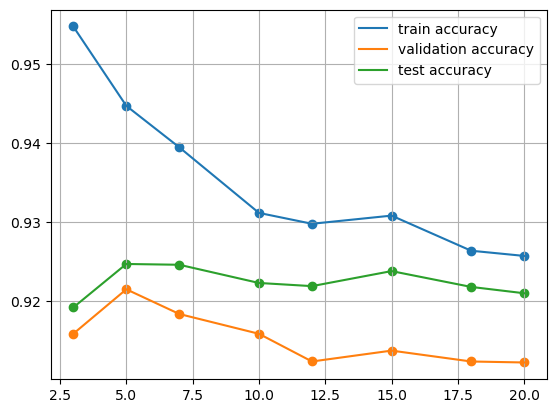

In [49]:
plt.plot(n_list,train_accuracy_scr_list,label='train accuracy')    #plotting accuracy score for all value of k
plt.scatter(n_list,train_accuracy_scr_list) #adding scatters
plt.plot(n_list,val_accuracy_scr_list,label='validation accuracy')    #plotting accuracy score for all value of k
plt.scatter(n_list,val_accuracy_scr_list) #adding scatters
plt.plot(n_list,test_accuracy_scr_list,label='test accuracy') #plotting accuracy score for all value of k
plt.scatter(n_list,test_accuracy_scr_list)    #adding scatters
plt.legend();   #adding legends
plt.grid();

# SVM Classifier

In [50]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train) #training to model

SVC()

In [51]:
svc_train_pred=svc_model.predict(x_train) #prediction on train data
svc_val_pred=svc_model.predict(x_val)     #prediction on val data
svc_test_pred=svc_model.predict(x_test)   #prediction on test data

In [52]:
acc_scr_svc_train=accuracy_score(y_train,svc_train_pred)  #accuracy score for train data
acc_scr_svc_val=accuracy_score(svc_val_pred,y_val)        #accuracy score for val data
acc_scr_svc_test=accuracy_score(svc_test_pred,y_test)     #accuracy score for test data

In [53]:
print(f"accuracy score for train data is {acc_scr_svc_train}%")

print(f"accuracy score for val data is {acc_scr_svc_val}%")

print(f"accuracy score for test data is {acc_scr_svc_test}%")

accuracy score for train data is 0.9580625%
accuracy score for val data is 0.946125%
accuracy score for test data is 0.9525%


In [54]:
#classification report
class_report_svc_test=classification_report(y_test,svc_test_pred)   #to get classification reprt
print(class_report_svc_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5638
           1       0.96      0.93      0.94      4362

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



Text(0.5, 1.0, 'Confusion matrix for test data')

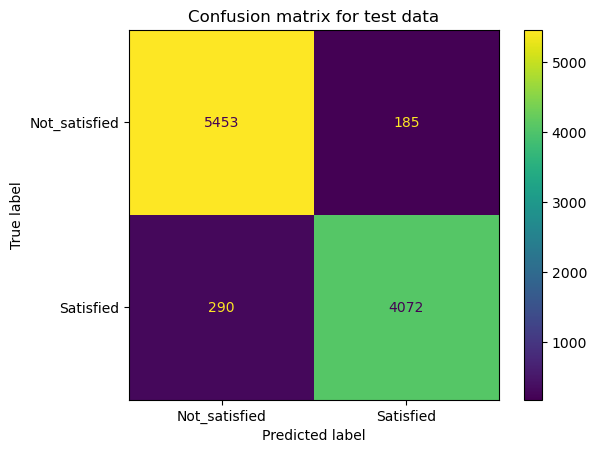

In [55]:
#confusion matrix
con_matrix_svc_test=confusion_matrix(y_test,svc_test_pred)  #to get confusion_matrix
#confusion matrix for train data
conf_svc_test_disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix_svc_test,display_labels=class_names)
conf_svc_test_disp.plot()
plt.title("Confusion matrix for test data")

# Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)  #model training

RandomForestClassifier()

In [57]:
rf_train_pred=rf_model.predict(x_train)
rf_val_pred=rf_model.predict(x_val)
rf_test_pred=rf_model.predict(x_test)

In [58]:
acc_scr_rf_train=accuracy_score(y_train,rf_train_pred)  #accuracy score for train data
acc_scr_rf_val=accuracy_score(rf_val_pred,y_val)        #accuracy score for val data
acc_scr_rf_test=accuracy_score(rf_test_pred,y_test)     #accuracy score for test data

In [59]:
print(f"accuracy score for train data is {acc_scr_rf_train}%")

print(f"accuracy score for val data is {acc_scr_rf_val}%")

print(f"accuracy score for test data is {acc_scr_rf_test}%")

accuracy score for train data is 1.0%
accuracy score for val data is 0.954%
accuracy score for test data is 0.9604%


In [60]:
#classification report
class_report_rf_test=classification_report(y_test,rf_test_pred)   #to get classification reprt
print(class_report_rf_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5638
           1       0.97      0.94      0.95      4362

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Text(0.5, 1.0, 'Confusion matrix for test data')

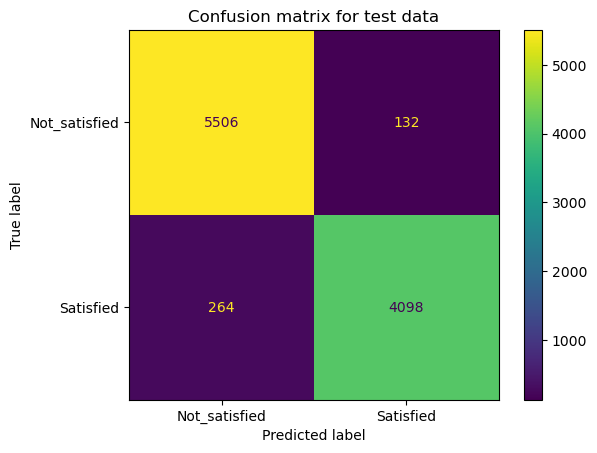

In [61]:
#confusion matrix
con_matrix_rf_test=confusion_matrix(y_test,rf_test_pred)  #to get confusion_matrix
#confusion matrix for train data
conf_rf_test_disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix_rf_test,display_labels=class_names)
conf_rf_test_disp.plot()
plt.title("Confusion matrix for test data")